# Análisis Factorial Exploratorio (AFE)

>Este tutorial es una selección y adaptación al español del libro [Multivariate Data Analysis](https://www.cengage.co.uk/books/9781473756540/) de Joseph F. Hair et al.

> Requiere cargar el archivo ["euthan.sav"](https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/AFE/euthan.sav) en el repositorio local. 


In [ ]:
!pip install pyreadstat
!pip install factor_analyzer
!wget https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/AFE/euthan.sav

## Diseño de un AFE

El análisis factorial exploratorio se realiza con mayor frecuencia sólo en variables métricas (cuantitativas), aunque existen métodos especializados para el uso de variables ficticias. 

Pueden incluirse un número limitado de “variables ficticias” en un conjunto de variables métricas que se analizan factorialmente siempre que representen atributos binarios.

### Tamaño de muestra

Regla de dedo: Si se está diseñando un estudio para revelar la estructura de los factores, trate de tener **al menos cinco casos por cada variable**.

- La muestra debe tener más observaciones que variables.
- El tamaño mínimo absoluto de la muestra debe ser de 50 observaciones, siendo **100 observaciones el mínimo preferido**.
- Aumente la muestra a medida que aumenta la complejidad del análisis factorial (es decir, el número de variables y / o factores retenidos).
- Esfuércese por **maximizar el número de observaciones por variable, con una proporción deseada de al menos 5 observaciones por variable**.
- Las comunalidades más altas entre las variables brindan soporte para tamaños de muestra más pequeños, en igualdad de condiciones.

## Supuestos de un AFE

Un supuesto básico del análisis factorial es que **existe alguna estructura subyacente en el conjunto de variables seleccionadas**. La presencia de variables correlacionadas y la posterior definición de factores no garantizan la relevancia, incluso si cumplen con los requisitos estadísticos. 

Es responsabilidad del investigador asegurarse de que los patrones observados sean conceptualmente válidos y apropiados para estudiar con análisis factorial exploratorio, porque la técnica no tiene ningún medio para determinar la idoneidad más que las correlaciones entre variables. 

Por ejemplo, no es apropiado mezclar variables dependientes e independientes en un análisis de un solo factor y luego usar los factores derivados para respaldar las relaciones de dependencia.

### Supuestos estadísticos

El investigador debe asegurarse de que la matriz de datos tenga correlaciones suficientes para justificar la aplicación del AFE. 

Si se encuentra que todas las correlaciones son bajas, o que todas las correlaciones son iguales (lo que denota que no existe una estructura para agrupar las variables), entonces el investigador debe cuestionar la aplicación del AFE. Para ello, se encuentran disponibles varios enfoques:

#### Inspección visual

Si la inspección visual revela un **pequeño número de variables con correlaciones mayores de .30**, entonces el AFE probablemente sea inapropiado.

Veamos un ejemplo:


In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_spss("euthan.sav")
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
scaled_df

,e1,e2,e3,e4,e5,e6,e7,e8,e9,e10,e11,e12
0,0.857588,0.785601,0.119556,0.154735,0.686161,0.865330,0.272019,0.041718,0.881063,0.916052,0.039223,0.011506
1,-0.867251,-0.472065,-0.717338,-0.781541,-0.402548,-0.270416,-0.595042,-1.022102,-0.072087,-1.728400,-0.784465,0.011506
2,0.857588,0.785601,-1.554233,0.154735,0.686161,0.865330,0.272019,0.041718,0.881063,0.916052,1.686599,0.833058
3,-0.004831,0.785601,-1.554233,0.154735,0.686161,0.865330,1.139081,1.105538,-1.025236,0.916052,0.039223,0.011506
4,-0.867251,-0.472065,0.956451,-0.781541,-1.491256,-0.270416,0.272019,0.041718,-1.025236,0.034568,0.039223,0.833058
...,...,...,...,...,...,...,...,...,...,...,...,...
352,0.857588,-0.472065,-1.554233,0.154735,0.686161,-0.270416,-0.595042,0.041718,-0.072087,0.916052,0.039223,0.011506
353,0.857588,0.785601,-0.717338,-0.781541,0.686161,0.865330,-0.595042,-1.022102,0.881063,0.916052,-0.784465,-0.810046
354,0.857588,0.785601,-0.717338,1.091011,0.686161,0.865330,1.139081,0.041718,0.881063,0.916052,1.686599,0.833058
355,-0.004831,-0.472065,-0.717338,0.154735,0.686161,-0.270416,0.272019,0.041718,-0.072087,0.034568,0.862911,0.011506


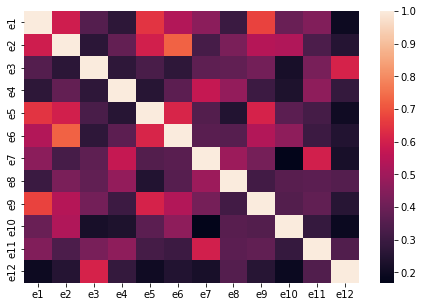

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7.5, 5))
sns.heatmap(scaled_df.corr())
plt.show()

Las correlaciones entre variables también se pueden analizar calculando las **correlaciones parciales entre variables**. Una correlación parcial es la correlación que no se explica cuando se tienen en cuenta los efectos de otras variables. 

Si existen factores “verdaderos” en los datos, la correlación parcial debe ser pequeña, porque la variable puede explicarse por la carga de las variables sobre los factores. **Si las correlaciones parciales son altas, lo que indica es que no hay factores subyacentes, entonces el análisis factorial exploratorio no es apropiado**.

Una regla general sería considerar las correlaciones parciales superiores a 0,7 como altas.

Veamos las correlaciones parciales en nuestro ejemplo:

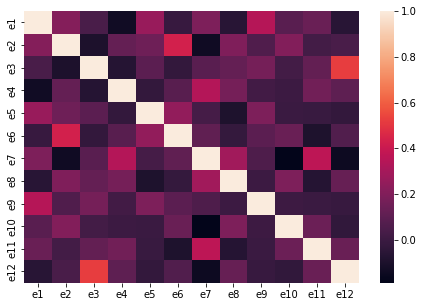

In [8]:
import pingouin as pg

plt.figure(figsize=(7.5, 5))
sns.heatmap(scaled_df.pcorr())
plt.show()

Podemos apreciar que son pocas las variables que presentan correlaciones parciales por encima de 0.7.

#### Prueba de Bartlett

La prueba de esfericidad de Bartlett es una **prueba estadística de la presencia de correlaciones entre las variables**. Proporciona la significancia estadística que indica que la matriz de correlación tiene correlaciones significativas entre al menos algunas de las variables. 

El investigador debe tener en cuenta, sin embargo, que al aumentar el tamaño de la muestra, la prueba de Bartlett se vuelve más sensible para detectar correlaciones entre las variables.

Apliquemos la prueba de Bartlett en nuestro ejemplo:

In [9]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

statistic, p_value = calculate_bartlett_sphericity(scaled_df)
print("Chi-squared: ", statistic)
print("p-value: ", p_value)

Chi-squared:  2047.1262764312712
p-value:  0.0


Una prueba de esfericidad de Bartlett estadísticamente significativa ($p < 0.05$) indica que existen suficientes correlaciones entre las variables para proceder a un análisis factorial.

#### Medida de adecuación del muestreo (MSA)

Este índice va de 0 a 1, llegando a 1 cuando cada variable puede ser perfectamente predicha sin error por las demás variables.

La MSA se puede interpretar con las siguientes pautas:
- $> .80$: meritorio
- $> .70$: medio
- $> .60$: mediocre
- $> .50$: miserable
- $< .50$: inaceptable.

El MSA aumenta a medida que (1) aumenta el tamaño de la muestra, (2) aumentan las correlaciones promedio, (3) aumenta el número de variables o (4) disminuye el número de factores.

En general, **los valores de MSA deben exceder .50 tanto para la prueba general como para cada variable individual**. 

Las variables con valores inferiores a .50 deben omitirse del análisis factorial una a la vez, omitiendo la más pequeña cada vez.

Apliquemos esta medida en nuestro ejemplo:

In [10]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_per_variable, kmo_total = calculate_kmo(scaled_df)

print("General MSA: ", kmo_total)
df_kmo_per_variable = pd.DataFrame(
    kmo_per_variable,
    index=scaled_df.columns.values,
    columns=["Individual MSA"],
)
df_kmo_per_variable

General MSA:  0.8645475574059576


,Individual MSA
e1,0.881099
e2,0.866680
e3,0.805751
e4,0.868400
e5,0.911213
e6,0.882760
e7,0.800743
e8,0.869044
e9,0.919635
e10,0.888761


Nuestro ejemplo cumple con medidas de MSA adecuadas tanto a nivel individual como a nivel general.

## Determinar el número de factores a extraer

Al momento de extraer factores, **el primer factor puede verse como el mejor resumen individual de las relaciones lineales exhibidas en los datos**. El segundo factor se define como la segunda mejor combinación lineal de las variables, sujeta a la restricción de que es ortogonal al primer factor.

Para ser ortogonal al primer factor, el segundo factor debe derivarse solo de la varianza restante después de que se haya extraído el primer factor. Por lo tanto, **el segundo factor puede definirse como la combinación lineal de variables que explica la mayor varianza que aún no se explica después de que el efecto del primer factor se ha eliminado de los datos**.

El proceso continúa extrayendo factores que representan cantidades cada vez más pequeñas de variación hasta que se explica toda la varianza.

La pregunta clave es: **¿cuántos factores extraer o retener?**

Al decidir cuándo dejar de factorizar (es decir, cuántos factores extraer), el investigador debe **combinar una base conceptual** (¿cuántos factores deberían estar en la estructura?) **con alguna evidencia empírica** (¿cuántos factores pueden ser razonablemente respaldados?).

No se ha desarrollado una base cuantitativa definitiva para decidir el número de factores a extraer. Sin embargo, actualmente se utilizan algunas reglas para definir para la cantidad de factores a extraer. Las revisamos a continuación:

#### Criterio de Kaiser

**Retener factores con autovalores superiores a 1**. 

Esta técnica es sencilla de aplicar, y el fundamento es que cualquier factor individual debe tener en cuenta la varianza de al menos una sola variable si se quiere conservar para la interpretación. **Se recomienda para el Análisis de Componentes Principales, y no para el análisis factorial común**. 

Apliquemos este criterio a nuestro ejemplo:

In [11]:
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer(n_factors=12, rotation=None)
fa.fit(scaled_df)
original_eigen_values, common_factor_eigen_values = fa.get_eigenvalues()

df_eigen = pd.DataFrame(
    [original_eigen_values, common_factor_eigen_values],
    index=["PCA Eigenvalues", "CF Eigenvalues"],
)
df_eigen.columns += 1
df_eigen = df_eigen.add_prefix("F")
df_eigen

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12
PCA Eigenvalues,5.323219,1.535566,1.063282,0.941109,0.634769,0.549586,0.412997,0.371781,0.339182,0.306357,0.29829,0.223864
CF Eigenvalues,5.043896,1.248941,0.774931,0.626468,0.272607,0.213525,0.109535,0.078919,0.046924,0.032179,0.00941,-0.000002


Según este criterio deberíamos preservar solo los tres primeros factores. La recomendación es observar el resultado de `PCA Eigenvalues`.

#### Criterio de la varianza explicada

**Retener suficientes factores para cumplir con un porcentaje específico de varianza explicada, generalmente 60 por ciento o más**.

El propósito es asegurar la importancia práctica de los factores derivados, asegurándose de que expliquen al menos una cantidad específica de varianza.

Apliquemos este criterio a nuestro ejemplo:

In [12]:
variance, proportional_variance, cumulative_variance = fa.get_factor_variance()

df_var = pd.DataFrame(
    [variance, proportional_variance, cumulative_variance],
    index=["SS Loadings", "Proportional variance", "Cumulative variance"],
)
df_var.columns += 1
df_var = df_var.add_prefix("F")
df_var

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12
SS Loadings,5.043896,1.248941,0.774931,0.626468,0.272607,0.213525,0.109535,0.078918,0.046924,0.032179,0.009410,0.000000
Proportional variance,0.420325,0.104078,0.064578,0.052206,0.022717,0.017794,0.009128,0.006577,0.003910,0.002682,0.000784,0.000000
Cumulative variance,0.420325,0.524403,0.588981,0.641186,0.663904,0.681697,0.690825,0.697402,0.701312,0.703994,0.704778,0.704778


Según este criterio, deberíamos preservar 4 factores para explicar al menos el 60% de la varianza. La recomendación es observar el resultado de `Cumulative variance`.

#### Criterio de Cattell

Recuerda que los factores extraídos contienen varianza común y única. Aunque todos los factores contienen al menos alguna varianza única, la proporción de varianza única es sustancialmente mayor en los factores posteriores. 

El criterio de Cattell se utiliza para **identificar el número óptimo de factores que se pueden extraer antes de que la cantidad de varianza única comience a dominar la estructura de varianza común**.

La prueba de criba se obtiene graficando los autovalores contra el número de factores en su orden de extracción, y la forma de la curva resultante se usa para evaluar el punto de corte.

Comenzando con el primer factor, la pendiente se inclina abruptamente hacia abajo inicialmente y luego se convierte lentamente en una línea aproximadamente horizontal en un **punto de inflexión** denominado por muchos como el "codo". 

Se considera que este punto en el que la curva comienza a enderezarse **representa los factores que contienen una varianza más única que común y, por lo tanto, son menos adecuados para la retención**.

Apliquemos este criterio a nuestro ejemplo:

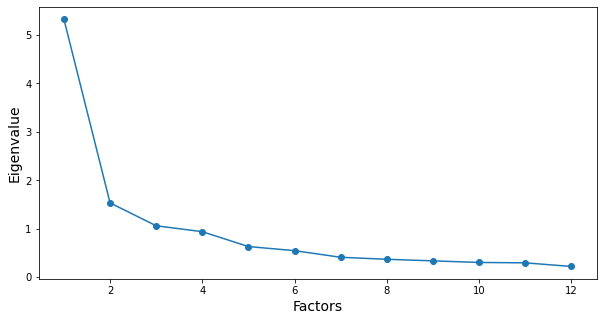

In [13]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 5))
plt.scatter(np.arange(original_eigen_values.size) + 1, original_eigen_values)
plt.plot(np.arange(original_eigen_values.size) + 1, original_eigen_values)
plt.xlabel("Factors", size=14)
plt.ylabel("Eigenvalue", size=14)
plt.show()

En nuestro caso, el codo estaría en el factor 5, de modo que optaríamos por tener solo 4 factores. Nota que con este criterio incluimos un factor más que con el criterio de Kaiser. 

Identificar el codo es muchas veces difícil y, por lo tanto, este método se considera más subjetivo que los demás.

#### Análisis paralelo de Horn

Este procedimiento **genera un gran número (por ejemplo, 500 o 1000) de conjuntos de datos simulados con valores aleatorios** para el mismo número de variables y tamaño de muestra que nuestros datos. 

Luego, cada uno de estos conjuntos de datos simulados se analiza factorialmente, ya sea con componentes principales o métodos de factor común, y **los autovalores se promedian para cada factor en todos los conjuntos de datos**. 

A continuación, estos valores se comparan con los autovalores extraídos de los datos originales y **se conservan todos los factores con autovalores superiores a los de los conjuntos de datos simulados**.

Apliquemos este método a nuestro ejemplo:

In [14]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [1]:
%%R
## Instalación completa. Tarda algunos minutos, pero vale la pena.
install.packages(c("psych","GPArotation"), dependencies=TRUE)

## Instalación rápida, sin incluir rotación oblimin
#install.packages("psych")

UsageError: Cell magic `%%R` not found.


Parallel analysis suggests that the number of factors =  4  and the number of components =  NA 


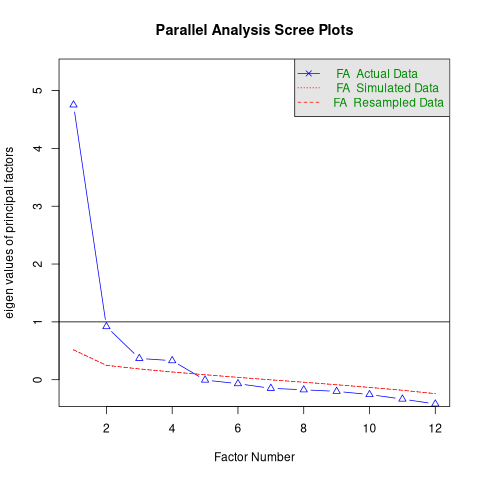

In [15]:
%%R -i scaled_df
library(foreign)
library(psych)

# Parallel Analysis with Psych package
parallel <- fa.parallel(scaled_df, n.iter=1000, fa="fa")

El método de análisis paralelo sugiere retener 4 factores. 

### Extracción de factores

Veamos ahora el resultado de extraer 4 factores:

In [16]:
fa = FactorAnalyzer(n_factors=4, rotation=None)
fa.fit(scaled_df)

loadings = pd.DataFrame(fa.loadings_, index=scaled_df.columns)
print("Cargas Factoriales:")
loadings.columns += 1
loadings = loadings.add_prefix("F")
loadings

Cargas Factoriales:


,F1,F2,F3,F4
e1,0.746731,-0.259467,-0.016012,-0.302649
e2,0.769004,-0.364312,-0.000957,0.281676
e3,0.582640,0.402019,0.476606,-0.135526
e4,0.563172,0.291738,-0.274500,0.200396
e5,0.695196,-0.335919,0.061153,-0.179471
e6,0.722729,-0.310767,-0.009162,0.167908
e7,0.675575,0.398699,-0.465296,-0.188224
e8,0.577266,0.249788,-0.073649,0.274039
e9,0.717223,-0.183525,0.067337,-0.242321
e10,0.519157,-0.191664,0.062131,0.233505


Podemos apreciar que **los factores se extraen en el orden de su varianza extraída**. El primer factor tiende a ser un factor general con casi todas las variables cargadas de manera significativa, y representa la mayor cantidad de varianza. El segundo factor y los siguientes se basan entonces en la cantidad residual de varianza. 

Cada uno explica porciones de variación sucesivamente más pequeñas. Debemos tener en cuenta que **el primer factor** no es necesariamente más "importante" que los factores subsiguientes para cualquier otro propósito (por ejemplo, predicción), pero solo que **representa la mayor varianza contabilizada en el conjunto de variables**.

In [17]:
communalities = pd.DataFrame(
    fa.get_communalities(), index=df.columns.values, columns=["Communalities"]
)
communalities

,Communalities
e1,0.716783
e2,0.803432
e3,0.746609
e4,0.517782
e5,0.632088
e6,0.647191
e7,0.867293
e8,0.476151
e9,0.611344
e10,0.364644


## Rotación de factores

El término rotación significa exactamente lo que implica. Específicamente, los ejes de referencia de los factores giran alrededor del origen hasta que se alcanza alguna otra posición.

El efecto final de rotar la matriz de factores es **redistribuir la varianza de los primeros factores a los últimos para lograr un patrón de factores más simple y teóricamente más significativo**.

### Tipos de rotación

El caso más simple de rotación es una **rotación de factor ortogonal**, en la que los ejes se mantienen a 90 grados. 

También es posible rotar los ejes y no retener el ángulo de 90 grados entre los ejes de referencia. Cuando no está limitado a ser ortogonal, el procedimiento de rotación se denomina **rotación de factor oblicua**.

Los dos tipos rotaciones se ilustran en las siguientes imágenes tomada de Hair et al. (2019):

<p align="center">
  <img width="500" src="https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/AFE/ortogonal.png" alt="Variable Types">
</p>

Al girar los ejes originales en el sentido de las agujas del reloj, como se indica en la figura, **los ejes se mantienen a 90 grados**. Este procedimiento significa que **los factores son matemáticamente independientes y que la rotación ha sido ortogonal**. Las cargas rotadas representan un patrón de carga de factores mucho más simplificado con variables que se cargan mucho solo en un solo factor.

La agrupación de estas variables en dos grupos es más obvia después de la rotación que antes, a pesar de que la posición o configuración relativa de las variables permanece sin cambios.

<p align="center">
  <img width="500" src="https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/AFE/oblique.png" alt="Variable Types">
</p>

Sin embargo, el método de **rotación oblicua es más flexible** porque los ejes de los factores no necesitan ser ortogonales. También es **más realista** porque no se supone que las dimensiones subyacentes teóricamente importantes no estén correlacionadas entre sí.

Ten en cuenta que la rotación oblicua **representa la agrupación de variables con mayor precisión**. Esta precisión es el resultado del hecho de que cada eje factorial rotado ahora está más cerca del grupo respectivo de variables. Además, la solución oblicua **proporciona información sobre la medida en que los factores están realmente correlacionados entre sí**.

Los enfoques **rotacionales ortogonales se utilizan más ampliamente** porque todos los paquetes informáticos con análisis factorial contienen opciones de rotación ortogonal y conservan la ortogonalidad entre los factores. 

Esto es **particularmente útil si se utilizan métodos de reducción de datos para crear puntuaciones para cada factor**, ya que estas puntuaciones también son ortogonales (es decir, **sin multicolinealidad**), lo que puede ser beneficioso en otras técnicas multivariadas.

#### Métodos de extracción ortogonal

En la práctica, el objetivo de todos los métodos de rotación es **simplificar las filas y columnas de la matriz de cargas factoriales para facilitar la interpretación**. 

Al simplificar las filas, nos referimos a hacer tantos valores en cada fila lo más cerca posible de cero (es decir, maximizar la carga de una variable en un solo factor). 

Al simplificar las columnas, nos referimos a hacer tantos valores en cada columna tan cerca de cero como sea posible (es decir, hacer que el número de cargas altas sea lo menos posible).

Se han desarrollado **tres enfoques ortogonales principales**:

- Varimax: Se centra en simplificar las columnas de la matriz de factores.
- Quartimax: Se centra en simplificar las filas de la matriz de factores.
- Equimax: En lugar de concentrarse en la simplificación de las filas o de las columnas, intenta lograr un poco de ambas.

En general, el patrón factorial obtenido por la rotación VARIMAX tiende a ser más invariante que el obtenido por el método QUARTIMAX cuando se analizan diferentes subconjuntos de variables. 

**El método VARIMAX ha demostrado su eficacia como método analítico para obtener una rotación ortogonal de factores y es el método de rotación ortogonal más utilizado**. 

En contraste, EQUIMAX no ha ganado una aceptación generalizada y se usa con poca frecuencia.

Apliquemos la rotación ortogonal a nuestro ejemplo:

In [18]:
fa = FactorAnalyzer(n_factors=4, rotation="varimax")
fa.fit(scaled_df)

loadings = pd.DataFrame(fa.loadings_, index=scaled_df.columns)
print("Cargas Factoriales:")
loadings.columns += 1
loadings = loadings.add_prefix("F")
loadings

Cargas Factoriales:


,F1,F2,F3,F4
e1,0.759255,0.234900,0.268340,0.114587
e2,0.428575,0.188419,0.759220,0.088539
e3,0.278379,0.216322,0.043672,0.787662
e4,0.055105,0.633675,0.298707,0.154838
e5,0.684145,0.117821,0.369717,0.116022
e6,0.453114,0.198522,0.627683,0.092095
e7,0.324917,0.866867,0.013462,0.100408
e8,0.042483,0.489038,0.387208,0.291991
e9,0.671468,0.210938,0.268763,0.209157
e10,0.239053,0.118731,0.523929,0.137473


Podemos apreciar cómo la rotación forzó las cargas factoriales a valores cercanos a cero para las variables no relacionadas a cada factor. 

Ahora veamos la estructura factorial gráficamente:

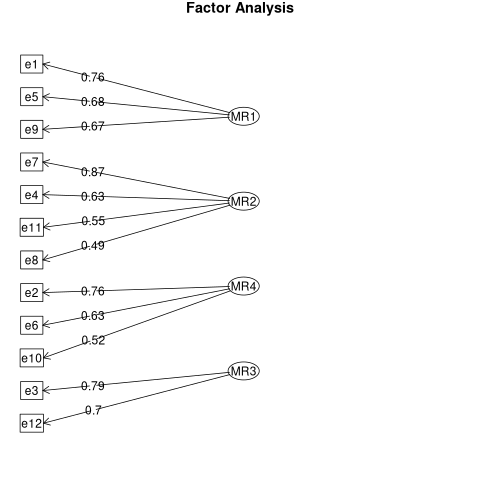

In [19]:
%%R -i scaled_df
# Extrae los factores
fit <- fa(scaled_df, nfactors=4,rotate="varimax")

# Genera gráfico de la estructura factorial
structure <- fa.diagram(fit, digits=2, cut=.3)

#### Métodos de extracción oblicua

Las rotaciones oblicuas son similares a las rotaciones ortogonales, excepto que las rotaciones oblicuas **permiten factores correlacionados en lugar de mantener la independencia entre los factores rotados**.

Con la posibilidad de factores correlacionados, el investigador de factores debe tener un cuidado adicional para validar los factores rotados oblicuamente, porque **tienen una forma adicional (no ortogonalidad) de volverse específicos de la muestra y no generalizables, particularmente con muestras pequeñas**.

Se cuentan con algunas alternativas:

- Oblimin: Es la más común. 
- Promax: Se puede calcular más rápidamente que una rotación oblimin directa, por lo que es útil para grandes conjuntos de datos. 

Apliquemos la rotación oblicua a nuestro ejemplo:

In [20]:
fa = FactorAnalyzer(n_factors=4, rotation="oblimin")
fa.fit(scaled_df)

loadings = pd.DataFrame(fa.loadings_, index=scaled_df.columns)
print("Cargas Factoriales:")
loadings.columns += 1
loadings = loadings.add_prefix("F")
loadings

Cargas Factoriales:


,F1,F2,F3,F4
e1,0.397107,0.201834,0.069122,0.492619
e2,0.918961,-0.017542,-0.022722,-0.019491
e3,-0.076456,0.028047,0.862679,0.101513
e4,0.232403,0.578918,0.034724,-0.260607
e5,0.518799,0.033631,0.075419,0.406685
e6,0.768151,0.035069,-0.002647,0.060743
e7,-0.074991,0.962508,-0.023864,0.062771
e8,0.329802,0.350162,0.203184,-0.290404
e9,0.367315,0.142194,0.179593,0.409873
e10,0.611126,-0.050136,0.072485,-0.069287


Dado que los factores no son necesariamente ortogonales, podemos explorar la correlación entre estos:

In [21]:
factor_corr = pd.DataFrame(fa.phi_)
print("Correalación entre factores:")
factor_corr.columns += 1
factor_corr.index += 1
factor_corr.set_index("F" + factor_corr.index.astype(str), inplace=True)
factor_corr = factor_corr.add_prefix("F")
factor_corr

Correalación entre factores:


,F1,F2,F3,F4
F1,1.000000,0.464985,0.407983,0.302323
F2,0.464985,1.000000,0.457979,0.171127
F3,0.407983,0.457979,1.000000,0.130324
F4,0.302323,0.171127,0.130324,1.000000


Además, podemos examinar la matriz de estructura, la cual muestra las correlaciones entre las variables observadas y los factores. 

> Nota: La matriz de estructura se puede obtener multiplicando la matriz de cargas factoriales por la matriz de correlación entre factores.

In [22]:
structure = pd.DataFrame(fa.structure_, index=scaled_df.columns)
print("Matriz de estructura:")
structure.columns += 1
structure = structure.add_prefix("F")
structure

Matriz de estructura:


,F1,F2,F3,F4
e1,0.668088,0.502440,0.387771,0.656221
e2,0.895642,0.396020,0.341624,0.252369
e3,0.319233,0.404956,0.857561,0.195626
e4,0.436971,0.658288,0.360709,-0.086752
e5,0.688157,0.379000,0.355483,0.579114
e6,0.801742,0.401431,0.334723,0.298629
e7,0.381802,0.927451,0.394529,0.201700
e8,0.487722,0.546874,0.460258,-0.104296
e9,0.630618,0.465381,0.447990,0.568659
e10,0.596440,0.255369,0.289823,0.116338


Podemos sintetizar esta información gráficamente: 

R[write to console]: Loading required namespace: GPArotation



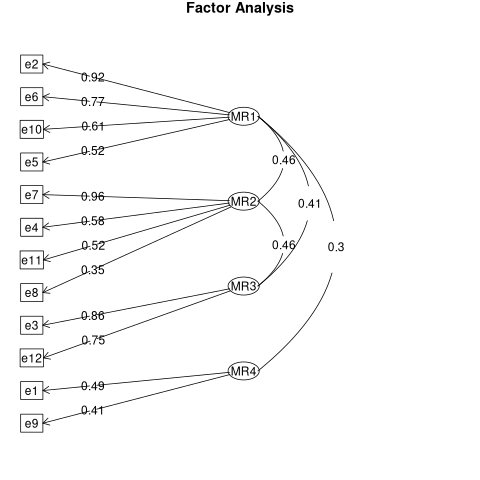

In [23]:
%%R -i scaled_df
# Extrae los factores
fit <- fa(scaled_df, nfactors=4,rotate="oblimin")

# Genera gráfico de la estructura factorial
structure <- fa.diagram(fit, digits=2, cut=.3)

## Interpretación de Factores



### Examinar las Cargas Factoriales

#### Signifcancia práctica

Utilizando la importancia práctica como criterio, podemos evaluar las cargas de la siguiente manera:
- Las cargas factoriales inferiores a .10 pueden considerarse equivalentes a cero con el fin de evaluar la estructura simple.
- Se considera que las cargas factoriales en el rango de .30 a .40 cumplen con el nivel mínimo para la interpretación de la estructura.
- Las cargas de .50 o más se consideran significativas practicamente.
- Las cargas superiores a .70 se consideran indicativas de una estructura bien definida y son el objetivo de cualquier análisis factorial.

En síntesis, aunque las cargas factoriales de .30 a .40 son mínimamente aceptables, **los valores superiores a .6 generalmente se consideran necesarios para la importancia práctica**.

En nuestro ejemplo de modelo simple de 4 factores extraidos rotados ortogonalmente, consideremos un punto de corte de .5 para evaluar la significancia práctica de las cargas factoriales:

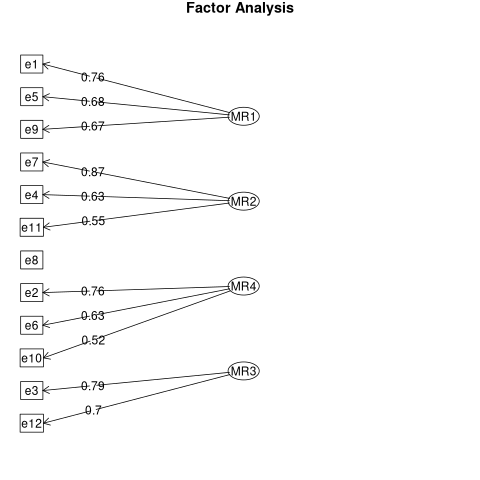

In [24]:
%%R
# Extrae los factores
fit <- fa(scaled_df, nfactors=4,rotate="varimax")

# Genera gráfico de la estructura factorial
structure <- fa.diagram(fit, digits=2, cut=.5)

Podemos observar que la variable `e8` no alcanza el mínimo para ser asociado a uno de los factores latentes. 

#### Significancia estadística

Para ser consideradas estadísticamente significativas:
- Se necesita una carga menor dado un tamaño de muestra mayor o un menor número de variables analizadas.
- Se necesita una carga mayor dada una solución factorial con un mayor número de factores, especialmente al evaluar las cargas en factores posteriores.

Veamos los criterios para evaluar la significancia estadística de las cargas factoriales según el tamaño de muestra (Hair et al. 2019):

<p align="center">
  <img width="400" src="https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/AFE/sig.png" alt="Variable Types">
</p>

Las pruebas estadísticas de significancia para las cargas factoriales **son generalmente conservadoras y deben considerarse solo como puntos de partida necesarios para incluir una variable para una consideración adicional**.

En nuestro ejemplo, contamos con una muestra de 357 casos, por lo que podemos esperar significancia estadística de las cargas factoriales a partir de .3:

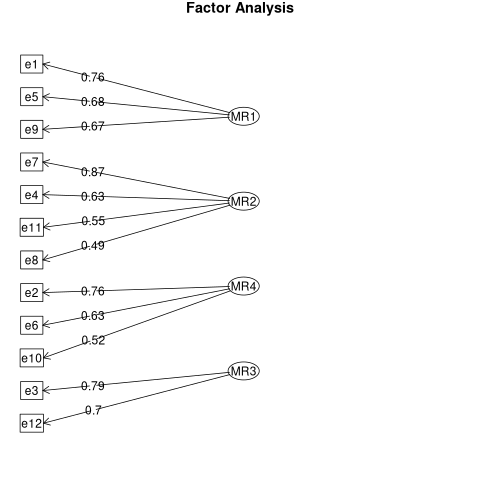

In [25]:
%%R
# Genera gráfico de la estructura factorial
structure <- fa.diagram(fit, digits=2, cut=.3)

Podemos observar que todas las variables tienen cargas factoriales estadísticamente significativas en al menos un factor.  

#### Cargas cruzadas

Una **estructura de factores óptima**, denominada estructura simple, **existe cuando todas las variables tienen cargas altas solo en un factor y cargas muy bajas en todos los demás factores**.

Las cargas cruzadas de una variable (cargas en dos factores) pueden evaluarse por la **razón de sus cargas al cuadrado** y clasificarse como problemáticas (razón entre 1.0 y 1.5), potenciales (razón entre 1.5 y 2.0) o ignorables (razón mayor que 2.0). 

Las cargas cruzadas problemáticas, y quizás incluso las potenciales, se eliminan a menos que estén justificadas teóricamente o el objetivo sea estrictamente la reducción de datos.

Evaluemos las cargas cruzadas en nuestro ejemplo:

In [26]:
fa_int = FactorAnalyzer(n_factors=4, rotation="varimax")
fa_int.fit(scaled_df)

sig_loadings = pd.DataFrame(fa_int.loadings_, index=scaled_df.columns)
sig_loadings[sig_loadings < 0.3] = None
sig_loadings.columns += 1
sig_loadings = sig_loadings.add_prefix("F")
sig_loadings

,F1,F2,F3,F4
e1,0.759255,NaN,NaN,NaN
e2,0.428575,NaN,0.759220,NaN
e3,NaN,NaN,NaN,0.787662
e4,NaN,0.633675,NaN,NaN
e5,0.684145,NaN,0.369717,NaN
e6,0.453114,NaN,0.627683,NaN
e7,0.324917,0.866867,NaN,NaN
e8,NaN,0.489038,0.387208,NaN
e9,0.671468,NaN,NaN,NaN
e10,NaN,NaN,0.523929,NaN


Aquí se muestran las cargas factoriales con significancia estadística. Podemos observar más de una variable con cargas cruzadas. 

Ahora examinemos la razón de sus cargas al cuadrado:

In [27]:
fa_int = FactorAnalyzer(n_factors=4, rotation="varimax")
fa_int.fit(scaled_df)


def cross_loading_eval(ratio):
    if ratio < 1.5:
        return "Problematic"
    elif ratio < 2:
        return "Potential"
    else:
        return "Ignorable"


squared_loadings = pd.DataFrame(fa_int.loadings_**2, index=scaled_df.columns)
squared_loadings.columns += 1
squared_loadings = squared_loadings.add_prefix("F")
squared_loadings["Ratio"] = squared_loadings.apply(
    lambda x: x.nlargest(2).values[0] / x.nlargest(2).values[1], axis=1
)
squared_loadings["Classification"] = squared_loadings["Ratio"].apply(
    cross_loading_eval
)
print("Cargas Factoriales al cuadrado:")
squared_loadings

Cargas Factoriales al cuadrado:


,F1,F2,F3,F4,Ratio,Classification
e1,0.576468,0.055178,0.072006,0.013130,8.005785,Ignorable
e2,0.183677,0.035502,0.576415,0.007839,3.138204,Ignorable
e3,0.077495,0.046795,0.001907,0.620411,8.005811,Ignorable
e4,0.003037,0.401544,0.089226,0.023975,4.500301,Ignorable
e5,0.468054,0.013882,0.136691,0.013461,3.424181,Ignorable
e6,0.205312,0.039411,0.393986,0.008481,1.918960,Potential
e7,0.105571,0.751458,0.000181,0.010082,7.118011,Ignorable
e8,0.001805,0.239158,0.149930,0.085259,1.595129,Potential
e9,0.450869,0.044495,0.072233,0.043747,6.241851,Ignorable
e10,0.057146,0.014097,0.274502,0.018899,4.803476,Ignorable


Las variables `e6` y `e8` presentan cargas cruzadas que pueden ser clasificadas como potencialmente problemáticas.  

### Evaluar las comunalidades

El investigador debe buscar cualquier variable que no esté adecuadamente considerada por la solución factorial. El investigador debe ver las comunalidades para evaluar si las variables cumplen con niveles aceptables de explicación. 

Por lo general, **las variables deben tener comunalidades superiores a .50 para ser retenidas en el análisis**.

Evaluemos las comunalidades en nuestro ejemplo.  

In [28]:
communalities = pd.DataFrame(
    fa_int.get_communalities(),
    index=df.columns.values,
    columns=["Communalities"],
)
communalities

,Communalities
e1,0.716783
e2,0.803432
e3,0.746609
e4,0.517782
e5,0.632088
e6,0.647191
e7,0.867293
e8,0.476151
e9,0.611344
e10,0.364644


Las comunalidades sugieren que la variables `e8`, `e10` y `e11` no se explican adecuadamente por nuestra solución factorial.

### Re-especificar el modelo 

Llegados a este punto, el investigador puede encontrar cualquiera de **varios problemas**: (a) una variable no tiene cargas significativas; (b) incluso con una carga significativa, la comunalidad de una variable se considera demasiado baja; o (c) una variable tiene una carga cruzada. 

En esta situación, el investigador puede tomar **cualquier combinación de los siguientes remedios**, ordenados según qué tan extremos son:
- **Ignorar** esas variables problemáticas e interpretar la solución tal cual, lo cual es apropiado si el objetivo es únicamente la reducción de datos, pero el investigador aún debe notar que las variables en cuestión están pobremente representadas en la solución factorial.
- Evaluar cada una de esas variables para una posible eliminación, dependiendo de la contribución general de la variable a la investigación, así como su índice de comunalidad. **Si la variable es de menor importancia para el objetivo del estudio o tiene un valor de comunalidad inaceptable, se puede eliminar** y luego se vuelve a especificar el modelo factorial derivando una nueva solución factorial sin esas variables eliminadas.


- Emplear un **método de rotación alternativo**, particularmente un método oblicuo si solo se han utilizado métodos ortogonales.
- **Disminuir/aumentar el número de factores retenidos** para ver si una estructura de factores más pequeña/más grande representará esas variables problemáticas.
- **Modificar el tipo de modelo factorial utilizado** (componente principal versus factor común) para evaluar si la variación del tipo de varianza considerada afecta la estructura factorial.

En nuestro ejemplo, la variable `e8` cuenta con comunalidad inaceptable y carga factorial cruzada potencialmente problemática. Podemos optar por eliminarla y re-especificar el modelo:

In [29]:
new_df = scaled_df.drop(columns=["e8"])
re_fa = FactorAnalyzer(n_factors=3, rotation="varimax")
re_fa.fit(new_df)

squared_loadings = pd.DataFrame(re_fa.loadings_**2, index=new_df.columns)
squared_loadings.columns += 1
squared_loadings = squared_loadings.add_prefix("F")
squared_loadings["Ratio"] = squared_loadings.apply(
    lambda x: x.nlargest(2).values[0] / x.nlargest(2).values[1], axis=1
)
squared_loadings["Classification"] = squared_loadings["Ratio"].apply(
    cross_loading_eval
)
print("Cargas Factoriales al cuadrado:")
squared_loadings

Cargas Factoriales al cuadrado:


,F1,F2,F3,Ratio,Classification
e1,0.488115,0.100950,0.015933,4.835231,Ignorable
e2,0.650134,0.029601,0.014518,21.963551,Ignorable
e3,0.048557,0.068242,0.483694,7.087963,Ignorable
e4,0.057253,0.284782,0.034500,4.974097,Ignorable
e5,0.542662,0.036204,0.015683,14.988820,Ignorable
e6,0.575415,0.038471,0.013632,14.957030,Ignorable
e7,0.041060,0.860765,0.009594,20.963781,Ignorable
e9,0.421306,0.078995,0.043552,5.333322,Ignorable
e10,0.280539,0.007644,0.020899,13.423353,Ignorable
e11,0.064220,0.334705,0.098271,3.405930,Ignorable


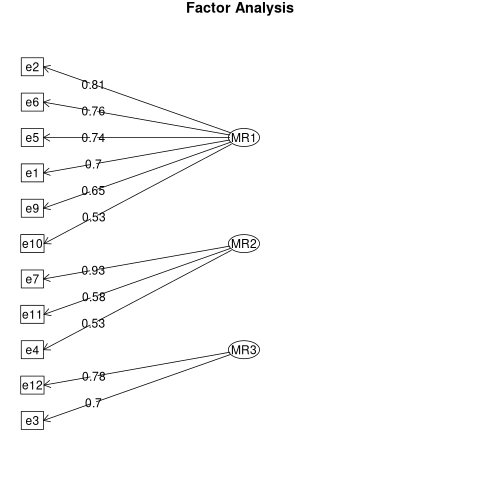

In [30]:
%%R -i new_df
# Extrae los factores
fit <- fa(new_df, nfactors=3,rotate="varimax")

# Genera gráfico de la estructura factorial
structure <- fa.diagram(fit, digits=2, cut=.3)

In [31]:
communalities = pd.DataFrame(
    re_fa.get_communalities(),
    index=new_df.columns.values,
    columns=["Communalities"],
)
communalities

,Communalities
e1,0.604998
e2,0.694253
e3,0.600492
e4,0.376535
e5,0.594550
e6,0.627518
e7,0.911419
e9,0.543852
e10,0.309083
e11,0.497196


Independientemente de lo que elijamos, **el objetivo final siempre debe ser obtener una estructura factorial con apoyo tanto empírico como conceptual**. Como hemos visto, se pueden utilizar muchos "trucos" para mejorar la estructura, pero la responsabilidad última recae en el investigador y en la base conceptual que subyace al análisis.

## Uso de resultados del AF en análisis subsecuentes

En este caso, el propósito es generalmente ampliar los resultados de los factores mediante la creación de variables de "sustitución" apropiadas que representen a cada factor para su posterior aplicación en otras técnicas estadísticas. Las dos opciones incluyen lo siguiente:

- Seleccionar la variable con la carga factorial más alta como **representante surrogada** para una dimensión de factor particular.
- Reemplazo del conjunto original de variables con un **conjunto de variables más pequeño** y completamente nuevo **creado a partir de escalas sumadas o puntajes de factores**.


### Escalas sumadas

En términos simples, **todas las variables que cargan mucho en un factor se combinan** y el total, o más comúnmente el puntaje promedio de las variables, **se usa como una variable de reemplazo**.

El cálculo de una escala sumada es un proceso sencillo mediante el cual los elementos que componen la escala sumada (es decir, los elementos con cargas altas del análisis factorial) se suman o promedian. **El enfoque más común es tomar el promedio de los ítems de la escala**, lo que proporciona al investigador un control completo sobre el cálculo y facilita su uso en análisis posteriores.

Calculemos una escala sumada a partir de nuestro ejemplo:

In [32]:
# Creamos una variable que mapee cada factor a las variables con las que presenta una mayor carga.
factor_index = {
    "F1": ["e1", "e2", "e5", "e6", "e9", "e10"],
    "F2": ["e4", "e7", "e11"],
    "F3": ["e12", "e3"],
}

print("Escala sumada:")
summated_scale = pd.DataFrame()
for i in factor_index:
    summated_scale[i] = new_df[factor_index[i]].mean(axis=1)
summated_scale

Escala sumada:


,F1,F2,F3
0,0.831966,0.155326,0.065531
1,-0.635461,-0.720349,-0.352916
2,0.831966,0.704451,-0.360587
3,0.370513,0.444346,-0.771363
4,-0.681943,-0.156766,0.894755
...,...,...,...
352,0.274206,-0.133695,-0.771363
353,0.831966,-0.720349,-0.763692
354,0.831966,1.305564,0.057860
355,-0.016445,0.429888,-0.352916


Este es el **procedimiento comunmente utilizado en el desarrollo de escalas psicométricas**. Recuerda que deben tomarse en cuenta cuatro aspectos básicos para la construcción de cualquier escala sumada: definición conceptual, dimensionalidad, confiabilidad y validez de constructo.

Calculemos la medida de confiabilidad Alfa de Cronbach en nuestro ejemplo:

In [33]:
cronbach = pd.DataFrame()
for i in factor_index:
    cronbach[i] = pg.cronbach_alpha(data=new_df[factor_index[i]])
cronbach.index = ["Cronbach’s α", "C.I. - 95%"]
cronbach

,F1,F2,F3
Cronbach’s α,0.877724,0.782615,0.755611
C.I. - 95%,"[0.857, 0.896]","[0.74, 0.819]","[0.699, 0.802]"


### Puntuaciones factoriales

La puntuación del factor representa **el grado en que cada individuo puntúa alto en el grupo de elementos con cargas altas en un factor**. Por lo tanto, valores más altos en las variables con cargas altas en un factor darán como resultado una puntuación de factor más alta. 

La única característica clave que diferencia una puntuación de factor de una escala sumada es que **la puntuación de factor se calcula en función de las cargas factoriales de todas las variables** en el factor, mientras que la escala sumada se calcula combinando solo las variables seleccionadas.

Calculemos las puntuaciones factoriales en nuestro ejemplo:

In [34]:
scores = re_fa.transform(new_df)
scores_df = pd.DataFrame(scores)
print("Puntuaciones factoriales:")
scores_df.columns += 1
scores_df = scores_df.add_prefix("F")
scores_df

Puntuaciones factoriales:


,F1,F2,F3
0,0.963360,0.085404,-0.089420
1,-0.490430,-0.556707,-0.210745
2,0.917636,0.308989,-0.179940
3,0.347586,1.062813,-0.999135
4,-1.061491,0.316602,0.871437
...,...,...,...
352,0.328774,-0.491383,-0.514065
353,1.256588,-0.786060,-0.825545
354,0.707604,1.130455,0.020333
355,-0.137276,0.403859,-0.249477
